# 1. Demonstrate possible missing value analysis approaches using any real world data

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import data
df = pd.read_csv("titanic_train.csv")

In [2]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

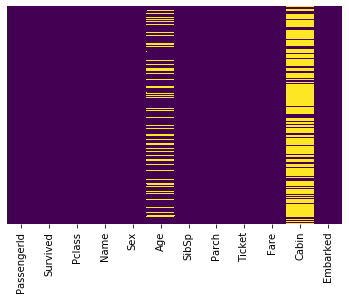

In [10]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**There are many ways to handle missing data.**

**1. Delete the entire row or column.**

**2. Impute the values, that is fill the values with avg, mean etc of the column.**

In [20]:
# Delete the entire cabin column as there is no way to predict 
df.drop('Cabin',axis=1, inplace=True)

**To fill in missing age data we can fill in the mean age of all the passengers. We can do this in a smarter way by checking the average age by passenger class. For example:**

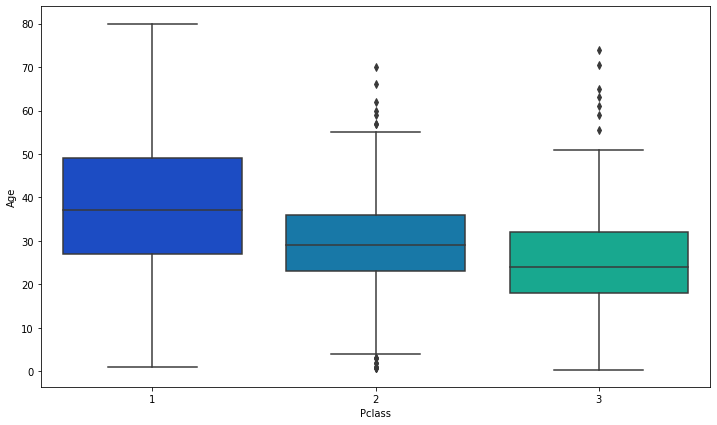

In [13]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [14]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [16]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

Visualize again to check for more null values

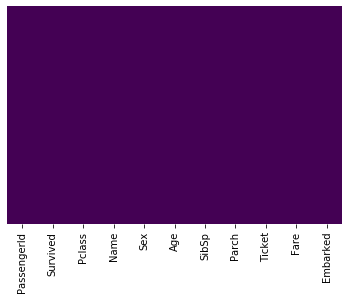

In [21]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# 2. Suppose you have height and weight data for a group of people. For example: Heights are in feet, like 6.5, and weight is in grams, like 80000. In many machine learning situations, you want to normalize thedata — scale the data so that the values in different columns have roughly the same magnitude so that large values (like the weight) don’t overwhelm smaller values (like the heights). Create a raw data of minimum 40 records of height and weight in above mentioned format and use MinMax Normalization to normalize the weights in the range from (-10.0 to 10) as well as use Z-score to normalize the weights.

**Create weight and height arrays**

In [94]:
weight = np.random.randint(20000, 80000, size=40)
height = np.random.randint(2, 6, size=40)

**Create dataframe**

In [95]:
data2 = {'Weight (in gms)':weight, 'height (in ft.)':height}
df2 = pd.DataFrame(data2, columns = ['Weight (in gms)','height (in ft.)'])

In [96]:
df2

,Weight (in gms),height (in ft.)
0,20218,2
1,48306,2
2,41264,4
3,63726,5
4,79054,5
5,67718,5
6,73269,3
7,50259,5
8,68119,3
9,66500,3


**MinMax Scaler**

In [99]:
from sklearn.preprocessing import MinMaxScaler 
MinMaxscaler = MinMaxScaler(feature_range=(-10, 10)) 
rescaled = MinMaxscaler.fit_transform(df2) 


In [100]:
rescaled

array([[-10.        , -10.        ],
       [ -0.45210415, -10.        ],
       [ -2.84587667,   3.33333333],
       [  4.78958461,  10.        ],
       [ 10.        ,  10.        ],
       [  6.14657693,  10.        ],
       [  8.03351689,  -3.33333333],
       [  0.2117751 ,  10.        ],
       [  6.28288803,  -3.33333333],
       [  5.7325447 ,  -3.33333333],
       [  4.75151268,  10.        ],
       [ -0.49255558,  10.        ],
       [ -6.48548508,  -3.33333333],
       [ -8.4947991 ,   3.33333333],
       [  8.90951118,  10.        ],
       [ -7.29281392,  -3.33333333],
       [ -6.85906588,  -3.33333333],
       [ -5.51261133,   3.33333333],
       [  0.24100891,  10.        ],
       [ -4.89088313,  10.        ],
       [ -6.44095452,  10.        ],
       [ -9.21578625,   3.33333333],
       [ -2.54164117,  -3.33333333],
       [ -2.09973486, -10.        ],
       [  0.79203209,   3.33333333],
       [  3.39689986,  10.        ],
       [  2.59806921,   3.33333333],
 

**Z Score Normalisation**

In [76]:
from sklearn.preprocessing import StandardScaler
Zscaler = StandardScaler().fit(df2)
rescaled2 = Zscaler.transform(df2)

In [108]:
x = [row[0] for row in rescaled]

In [112]:
y = [row[1] for row in rescaled2]

**Visualizations**

Original weight and MinMax scaled weight

Text(0.5, 1.0, 'Scaled data')

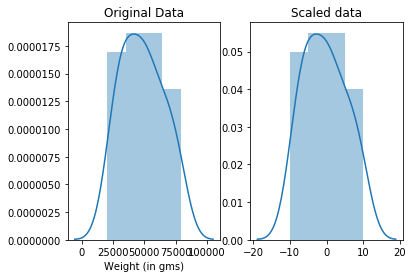

In [109]:
fig, ax=plt.subplots(1,2)
sns.distplot(df2['Weight (in gms)'], ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(x, ax=ax[1])
ax[1].set_title("Scaled data")

Original height and Z Score Normalised height

Text(0.5, 1.0, 'Scaled data')

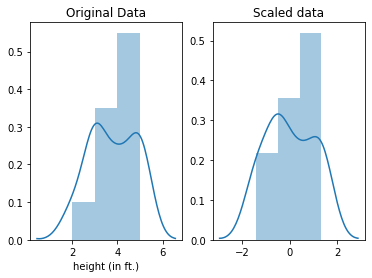

In [113]:
fig, ax=plt.subplots(1,2)
sns.distplot(df2['height (in ft.)'], ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(y, ax=ax[1])
ax[1].set_title("Scaled data")